<h1>Math</h1>

In this notebook we are going to look at bidirectional RNNs

This should be rather short, since the idea behind it isnt to complicated nor is the code

However, despite being so simple bidirectional RNNs are an easy way to imporve our NN's ability to learn

And there is good practical motivation for this, so thats what we are going to look at

---

<h3>Bidirectional RNNs</h3>

So first lets talk about motivation

Why is there a need for bidirectional RNNs in the first place ?

It helps to put this into the xonttext of an NLP task, such as NER (Named Entity Recognition)

This is a task where we try to extract named entities such as people, companies, dates, times and so on

consider the sentence

"<strong>General</strong> relativity is an exciting theory about the physics of space and time"

In this sentence, the word general wouldnt be labeled as anything since it is not a person, its not a company, its not a date or a time or a location

Now consider the sentence

"<strong>General Zod</strong> is an enemy of <strong>Superman</strong>"

In this sentence, we might mark "General Zod" as a Person, since thats how we refer to the character in the Superman comics

Now consider the sentence

"<strong>General Motors</strong> manufactures cars and trucks"

In this sentence, "General Motors" is a company (Org)

---

so in all three of these cases, the word "General" would be tagged as something else

But the problem is, the word "General" appears at the beginning of the sentence

<ul>
    <li>General relativity is an exciting theory about the physics of space and time</li>
    <li>General Zod is an enemy of Superman</li>
    <li>General Motors manufactures cars and trucks</li>
</ul>

which means our LSTM or GRU wont see any of the other words of the sentence before it has an opportunity to make a prediction on the word "General"

of course we as humans can easily see that the word "General" has a different role in all three setneces, because we can see the whole sentence simultaneously

so, how do we solve this problem ?

---

well given that this notebook is all about Bidirectional RNNs, then the we should have guessed by now that the solution to this is to use Bidirectional RNNs (tadaaa !)

so lets look at how a bidirectional RNN works

the basic idea is this, we first do a normal RNN calculation as usual

<img src='extras/34.1.PNG' width='450'></img>

lets pretend, for simplicity sake, we are using an RNN or a GRU so there is only one hidden state which we will call $h_t$

notice how in this special circumstance, we draw arrows over the $h$s, the reason why will become apparent soon

ok, so these $h$s are just what we get with the regular RNN going forward in time

---

Now suppose we had another RNN, but this time we calculated all the $h$s in reverse

<img src='extras/34.2.PNG' width='450'></img>

so we start with $h_T$ then we calculate $h_{T-1}$  and we work all the way back to $h_1$

notice how these arrows are facing backwards, to denote that, with this RNN we have calculated the hidden states by looking at the input sequence in reverse

and of course this idea of going backwards, helps us solve our problem of accurately marking the named entity for the word "General" that appeared at the beginning of our example sentences

---

So a Bidirectional RNN is an RNN where we just calculate both the forward $\overrightarrow{h}$s and the backward $\overleftarrow{h}$s at the same time

<img src='extras/34.3.PNG' width='450'></img>

to get the final output, we just concatenate these vectors together

$$\large h_t = \bigg[\overrightarrow{h_t},\overleftarrow{h_t}\bigg]$$

so if the layer size of each individual RNN is $M$, then $\overrightarrow{h}$s will give us a sequence of size $T \times M$ and $\overleftarrow{h}$s will also give us a sequence of size of $T \times M$

Agter concatenating them, we will, of course, get a sequence of size $T \times 2M$

or we can think of it as, $h_t$ is a vector of size $2M$ and we have $T$ of them

---

<h3>Many-to-one</h3>

One think we might recall from before (notebook 32) where we talked about many-to-one problems such as spam classification, we have several options for which hidden state we want to look at to get the final output

<img src='extras/34.4.PNG' width='600'></img>

One of those oprions was just to get the final $h_T$ at the end of the input sequence since that would mean that we have read all the words in the input

well, we can see that this does not quite make sense in a Bidirectional RNN

for the sequence going backwards, $\overleftarrow{h_t}$ has only looked at one word, the final word in the sequence

so in this case what makes more sense ?

what we will do in this scenario is that we will take $\overrightarrow{h_T}$ and $\overleftarrow{h_1}$ and concatenate these two together to get what we are going to call the output of the RNN unit

$$\large h_t = \bigg[\overrightarrow{h_T},\overleftarrow{h_1}\bigg]$$

in this case, both the forward RNN and the backward RNN have seen all the words in the sentence

from this we can pass it into the dense layer, calculate $y$ and so on

In fact this is the default behaviour in keras, if ```return_sequences=False``` (we are going to see this in code)

---

of course we do know of one other way to deal with many-to-one tasks, and that is to just consider all the hidden states at a time

this takes into account all the hidden states and just takes the max, just like what we would do in a CNN (and thus instructor's preference)

$$ out = \max_t h_t$$

in fact, this kind of thinking is going to come in handy later, when we take about Attention

the basic idea is this, any of these hidden states could be useful so lets try to pick the best one

in this scenario, all we do is take the max of $h_t$ over all time, pass this through a dense layer and get out output prediction

---

<h3>In Keras</h3>

One cool thing about the bidirectional RNN is that it requires almost zero changes to our code

we use what is called a wrapper layer in Keras, how this works is, anywhere we see an RNN layer like ```LSTM(M)```, we just wrap that with a bidirectional layer ```Bidirectional(LSTM(M))```, and that automatically makes it a bidirectional LSTM

so keras makes things supereasy for us if we want to use Bidirectional RNNs

just like when we looked at normal LSMTs and GRUs, there is some nuance when it comes to debugging code

what exactly does a Bidirectional RNN return if we set ```return_state``` and ```return_sequences``` to True/False

In the next code section we will do a simple test to explore the API of the bidirectional RNN in keras

---

<h3>When not to use a Bidirectional RNN</h3>

One last thing we want to mention is that, while Bidirectional RNNs are powerful, there may be some situations where using one is not appropriate

In genreal, Bidirectional RNNs should not be used when our task is to predict the future

if we are trying to predict tomorrow's stock price or whether for example or if we are trying to predict who is going to win the next big tennis match, in these types of situations where we have to predict something from the future it doesnot make sense to use a Bidirectional RNN because that would require having data from even further into the future, which of course is not possible

so we dont use Bidirectional RNNs to predict the future

For NLP it makes sense because generally, we get to see the entire input seqeunce all at once

<h1>code</h1>

In [1]:
# so we basically look at whats returned, thats the shape of each thing, and what effects do the arguments have
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,LSTM,GRU,Bidirectional
import numpy as np

In [11]:
T = 8 # sequence length
D = 2 # input dimensionality
M = 3 # latent dimensionality

X = np.random.randn(1,T,D) # one input sequence

In [12]:
# create our model
# two experiments with return_state=True
# first experiment : return_sequences=True
# second experiment : return_sequences=False
input_ = Input(shape=(T,D))
rnn = Bidirectional(LSTM(M,return_state=True,return_sequences=True))
x = rnn(input_)

model = Model(input_,x)

In [13]:
o,h1,c1,h2,c2 = model.predict(X)

print('o',o) # output
print('o.shape',o.shape)
print('h1',h1) # hidden state of forward LSTM
print('c1',c1) # cell state of backward LSTM
print('h2',h2) # hidden state of backward LSTM
print('c2',c2) # cell state of backward LSTM

o [[[-0.04809046 -0.04750615  0.06153975  0.11790699 -0.12269498
    0.06011644]
  [-0.09302795 -0.14974168  0.1257619   0.04397364 -0.06537843
   -0.04541238]
  [ 0.07669261  0.14032972 -0.0185649  -0.00287098  0.01367933
   -0.20762715]
  [ 0.2626414   0.2022909  -0.22558816  0.02559306  0.02329346
   -0.07691372]
  [ 0.27084756  0.27851665 -0.16722026  0.05964515 -0.05614446
    0.08746254]
  [ 0.16887458  0.11743172  0.04004222  0.03000818 -0.04737357
    0.13269912]
  [ 0.0577307   0.17692216  0.00513203  0.03962826 -0.04912725
    0.07995328]
  [-0.09268878  0.01443559  0.11351901 -0.00334075  0.01137632
    0.11271737]]]
o.shape (1, 8, 6)
h1 [[-0.09268878  0.01443559  0.11351901]]
c1 [[-0.13154662  0.02627203  0.41971704]]
h2 [[ 0.11790699 -0.12269498  0.06011644]]
c2 [[ 0.23106983 -0.34563363  0.12644002]]


In [14]:
# ok so this is pretty interesting
# one thing we remember from our previous study 
# is that the hidden state should correspond to the last output
# sicne the output simply contains the hidden state at each time step

# so h1 (which is h(T) of forward Bi-LSTM) is the same as the first 3 elements of o[-1]
print('h1 - first M elements of o[-1]')
print(h1,o[0][-1][:M])

# and h2 (which is h(1) of backward Bi-LSTM) is the sane as last 3 elements of o[0]
print('h2 - last M elements of o[0]')
print(h2,o[0][0][-M:])

h1 - first M elements of o[-1]
[[-0.09268878  0.01443559  0.11351901]] [-0.09268878  0.01443559  0.11351901]
h2 - last M elements of o[0]
[[ 0.11790699 -0.12269498  0.06011644]] [ 0.11790699 -0.12269498  0.06011644]


In [15]:
# now again with return seuqences = False
input_ = Input(shape=(T,D))
rnn = Bidirectional(LSTM(M,return_state=True,return_sequences=False))
x = rnn(input_)

model = Model(input_,x)

In [16]:
o,h1,c1,h2,c2 = model.predict(X)

print('o',o) # output
print('o.shape',o.shape)
print('h1',h1) # hidden state of forward LSTM
print('c1',c1) # cell state of backward LSTM
print('h2',h2) # hidden state of backward LSTM
print('c2',c2) # cell state of backward LSTM

o [[ 0.00322486  0.05881823 -0.01087529 -0.21382873 -0.06509628 -0.08188722]]
o.shape (1, 6)
h1 [[ 0.00322486  0.05881823 -0.01087529]]
c1 [[ 0.00588418  0.12177576 -0.03013453]]
h2 [[-0.21382873 -0.06509628 -0.08188722]]
c2 [[-0.31919807 -0.18827742 -0.12180948]]


In [17]:
# as expected, the output is jsut the concatenation of h1 and h2
# but what's weird about this from a programming persepctive 
# is that its a weird mix of the output we get when we returned it as a sequence
# so its not just the last row of that seqeucne, 
# its instead the first part of the last row and the second part of the first row 
# concatenated together

In [18]:
# next lets redo our toxic comments example using Bi-LSTMs

<h1>code</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,LSTM,GlobalMaxPool1D,Embedding,Bidirectional
from tensorflow.keras.models import Model
from sklearn.metrics import roc_auc_score
import tensorflow as tf

In [2]:
MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 100 # we will be using GloVe [50,100,200,300]
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 10
M = 15

In [3]:
# first lets load in data and take a look at it
data = pd.read_csv('datasets/toxic comments/train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
# so we have a multilabel classification problem
X = data['comment_text'].to_numpy()
Y = data.iloc[:,2:].to_numpy()

In [5]:
# next lets tokenise our sentences
tokeniser = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokeniser.fit_on_texts(X)
X = tokeniser.texts_to_sequences(X)

word2idx = tokeniser.word_index

In [6]:
# next we pad our sentences
X = pad_sequences(X,maxlen=MAX_SEQUENCE_LENGTH)

In [7]:
# next we want to create our embedding matrix
# first we load in the pre trained word vectors
file = 'datasets/glove/glove.6B.'+str(EMBEDDING_DIM)+'d.txt'
word2vec = {}
for line in open(file,encoding='utf8'):
    line = line.split()
    word = line[0]
    vec = line[1:]
    vec = np.array(vec).astype('float32')
    word2vec[word] = vec


In [8]:
V = min(len(word2idx)+1,MAX_VOCAB_SIZE)
# now lets create our embedding matrix
embedding = np.zeros((V,EMBEDDING_DIM))

# now we fill the matrix with the pretrained word embeddings
# if a word is not in our pretrained vectors , we leave it as zeros

for word,idx in word2idx.items():
    vec = word2vec.get(word,0)
    if idx < V:
        embedding[idx] = vec


In [9]:
embedding_layer = Embedding(
    V,
    EMBEDDING_DIM,
    weights = [embedding],
    input_length=MAX_SEQUENCE_LENGTH,
    trainable = False
)


In [10]:
# now we are ready to build our model !
# Input shape now is NxT
# so at each time step we have index of a word
i = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(i) # NxTxD
# here we just warp LSTM with Bidirectional
x = Bidirectional(LSTM(M,return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(128,activation='relu')(x)
# we are doing 6 seperate binary classifications
o = Dense(Y.shape[1],activation='sigmoid')(x)

model = Model(i,o)


In [11]:
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics = ['accuracy']
)

In [12]:
with tf.device('/cpu:0'):
    r = model.fit(
        X,Y,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_split = VALIDATION_SPLIT
    )

Epoch 1/10
998/998 [==============================] - 57s 52ms/step - loss: 0.1163 - accuracy: 0.8899 - val_loss: 0.0622 - val_accuracy: 0.9941
Epoch 2/10
998/998 [==============================] - 52s 52ms/step - loss: 0.0560 - accuracy: 0.9940 - val_loss: 0.0569 - val_accuracy: 0.9940
Epoch 3/10
998/998 [==============================] - 53s 53ms/step - loss: 0.0537 - accuracy: 0.9935 - val_loss: 0.0586 - val_accuracy: 0.9873
Epoch 4/10
998/998 [==============================] - 52s 53ms/step - loss: 0.0497 - accuracy: 0.9938 - val_loss: 0.0514 - val_accuracy: 0.9931
Epoch 5/10
998/998 [==============================] - 52s 52ms/step - loss: 0.0479 - accuracy: 0.9930 - val_loss: 0.0502 - val_accuracy: 0.9937
Epoch 6/10
998/998 [==============================] - 51s 51ms/step - loss: 0.0470 - accuracy: 0.9934 - val_loss: 0.0508 - val_accuracy: 0.9923
Epoch 7/10
998/998 [==============================] - 51s 51ms/step - loss: 0.0453 - accuracy: 0.9931 - val_loss: 0.0500 - val_accuracy:

In [13]:
# one interesting thing is, this actually runs faster on our CPU than on our GPU
# for the previous two examples, the CNN & LSTM (notebook 32), we got faster performance on our GPU
# but for some reason, when we stwitched it to Bi-LSTM things slowed down a bit
# so thats smth to keep in mind, not everything is optimised for GPU
# and sometimes, things can be faster on GPU than CPU
# although it is rare
# there are differences between libraries too
# so for example tensorflow would be faster than pytorch in one thing
# and pytorch would be faster than tensorflow  at another thing
# and there is no guarantee that all the implementations for things in keras contain optimal tensorflow code
# although given that the people working at it are the leading experts in the feild
# we should generally feel pretty safe using keras

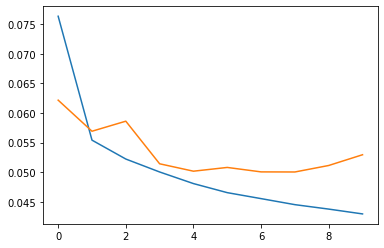

In [14]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.show()

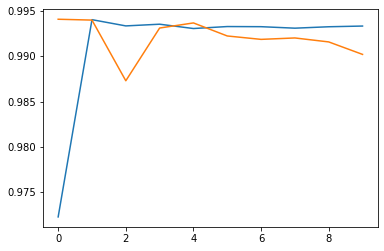

In [15]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.show()

In [16]:
# next lets calculate the auc score
# first we want to make predictions
p = model.predict(X)
# then we want to calculate auc for each column
# then take the mean
aucs = []
for i in range(p.shape[1]):
    auc = roc_auc_score(Y[:,i],p[:,i])
    aucs.append(auc)

print('AUC : ',np.mean(aucs))

AUC :  0.9848174784070745


<h1>Math</h1>

Now we will be seeing another cool application of Bidirectional RNNs

---

<h3>Image Classification with Bidirectional RNNs</h3>

We saw before (notebook 32) how CNNs, which are typically used for images, could also be used for NLP

This time, we are going to do the opposite, we will see how RNNs, which are typically used for NLP, or more generally sequences, can also be used for images

---

<h3>Architecture</h3>

Now we want to go over the basic architecture of our RNN classifier, and see how it makes use of Bi-directional RNNs

The trick here is, thinking of an image, as a sequence of image pixels

one problem with this, that we can immediately see, is what we takled about before, images are 2D signals, whereas sequences and NLP, such as audio and text, are 1-D signals

RNNs, such as GRU and LSTM, workd on 1-D signals because they only go in one direction

so how can they work on a 2-D signal like an image

which direction is time ?

<img src='extras/34.5.PNG' width='600'></img>

---

To solve this problem, we have to look at the image in two different ways

<img src='extras/34.6.PNG' width='600'></img>

first picture our sequence of word vectors which we have seen before

this is a $T \times D$ matrix, $T$ is the sequence length and $D$ is the feature dimensionality

on this input sequence we run our RNN from top to bottom or if we are using a Bidirectional RNN, which we are, we run our RNN from top to bottom and from bottom to top

with an image, we have an object that is $H \times W$, but importantly its still 2D

so we can scan it from top to bottom and bottom to top, we are just sort of losing some perspective

in this scenario, we think of the height of the image as different points of time, but we think of the width of the image as different features

---

but now lets do something interesting 

if we rotate this image $90^\circ$, now the original height is going in the horizontal direction and the width is going into the vertical direction

<img src='extras/34.7.PNG' width='600'></img>

Now we cab run another Bidirectional LSTM and now its going along the image's original width dimension

so in other words, if we rotate the image first, and we run a Bidirectional LSTM on it, then we are effectively now treating the width as different points in time and the height as different features

---

what happens if we do this is that we get two different branches in our model

<img src='extras/34.8.PNG' width='600'></img>

we have the vertical RNN and the horizontal RNN

As usual, we are going to use global maxpooling in order to pick out the most useful hidden states from our RNN scan

as a quiz, we might want to try to guess what the output size of this is going to be

suppose the dimensionality of a single LSTM is $M$

what's the shape of the data going to be after going the data through a Bidirectional LSTM and global maxpooling ?

---

So if we recall the output size of a Bidirectional LSTM is $2M$

so far a batch size of $N$, the output of our first Bidirectional LSTM will be $N \times H \times 2M$

remember that $H$ is like the time dimension $T$ for the first TNN unit

and we know that pooling operated over the time dimension, so basically that goes awy and we get $N \times 2M$ at the end

for the second, Bidirectional LSTM, we have the opposite scenario

we have rotated the image, so the data is of shape $N \times W \times H$, and the RNN is going to treat width like time

so the output of the second bi-directional LSTM will be $N \times W \times 2M$, and after maxpooling we will get $N \times 2M$

---

so now we have two things of $N \times 2M$, in deep learning the typical way of dealing with this is just to concatenate them together

<img src='extras/34.10.PNG' width='700'></img>

so two things of $N \times 2M$, gives us $N \times 4M$

of course we have to concatenate along the feature dimension because we cant end up with more samples than we started with

---

After this, the process is as usual

we pass the data through a dense layer, and put it through a softmax activation

<img src='extras/34.11.PNG' width='700'></img>


<h1>code</h1>

In [16]:
# now lets try with the MNIST dataset
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,LSTM,GlobalMaxPool1D,Bidirectional,Concatenate,Lambda
from tensorflow.keras.optimizers import Adam,SGD

In [2]:
mnist = tf.keras.datasets.mnist

(Xtrain,Ytrain),(Xtest,Ytest) = mnist.load_data()
Xtrain,Xtest = Xtrain/255 , Xtest/255

In [20]:
M = 15
D = Xtrain.shape[1]
K = len(set(Ytrain))

In [13]:
def rotate(X):
    return tf.transpose(X,(0,2,1))

In [23]:
# now lets create our model
input_ = Input(shape=(D,D))

# vertical branch
x_vertical = Bidirectional(LSTM(M))(input_) # N x 2M

# horizontal branch
# first rotate image
rotator = Lambda(rotate)
rotated = rotator(input_)
x_horizontal = Bidirectional(LSTM(M))(rotated) # N x 2M

# now concatenate
concatenator = Concatenate()
x = concatenator((x_vertical,x_horizontal)) # N x 4M

# then our final dense layer + softmax
output = Dense(K,activation='softmax')(x)

model = Model(input_,output)

In [25]:
# now lets compile our model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [26]:
r = model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 23s 9ms/step - loss: 0.8796 - accuracy: 0.7370 - val_loss: 0.2059 - val_accuracy: 0.9358
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1845 - accuracy: 0.9436 - val_loss: 0.1228 - val_accuracy: 0.9596
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1331 - accuracy: 0.9596 - val_loss: 0.1029 - val_accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0999 - accuracy: 0.9689 - val_loss: 0.0944 - val_accuracy: 0.9706
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0858 - accuracy: 0.9750 - val_loss: 0.0926 - val_accuracy: 0.9714
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0759 - accuracy: 0.9762 - val_loss: 0.0778 - val_accuracy: 0.9733
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0694 - accuracy: 0.9789 - val_loss: 0.0691 - val_ac

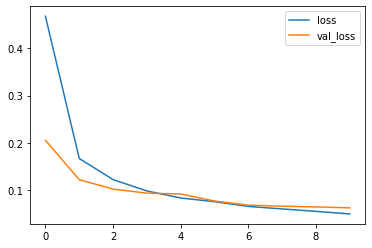

In [27]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

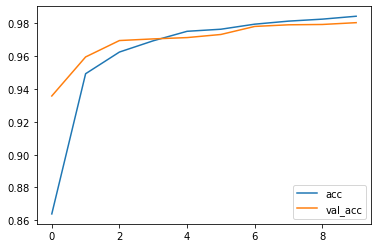

In [28]:
plt.plot(r.history['accuracy'],label = 'acc')
plt.plot(r.history['val_accuracy'],label = 'val_acc')
plt.legend()
plt.show()